<a href="https://colab.research.google.com/github/AhmedEloumi/Applications-of-Autoencoders/blob/main/domain_adaptation_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os

In [5]:
SIZE=256  
img_data=[]
img=cv2.imread('/content/einstein_original.jpg', 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [6]:
img_data2=[]  #Second image to be provided as ground truth. 

img2=cv2.imread('/content/monalisa_original.jpg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255

In [7]:
#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [8]:
model.fit(img_array, img_array2,
        epochs=5000,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1/1 [==============================] - 0s 14ms/step - loss: 0.0033 - accuracy: 0.7776
Epoch 2502/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - accuracy: 0.7909
Epoch 2503/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.0033 - accuracy: 0.7721
Epoch 2504/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 0.7838
Epoch 2505/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 0.7708
Epoch 2506/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0032 - accuracy: 0.7920
Epoch 2507/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0031 - accuracy: 0.7837
Epoch 2508/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.0032 - accuracy: 0.7817
Epoch 2509/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.0032 - accuracy: 0.7888
Epoch 2510/5000
1/1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output


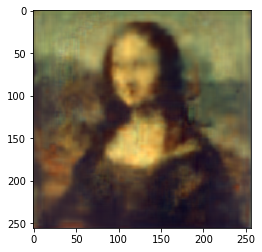

In [12]:
print("Output")
pred = model.predict(img_array) 
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

In [13]:
#img2 = Image.fromarray(pred[0], 'RGB')
#img2.save("processed_img.jpg")
#we can apply autoencoder for denoising the nose